In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import lbg_forecast.tools as tools
import lbg_forecast.sfh as sfh

In [3]:
sps_params = np.load("models/sps_params.npy")

In [4]:
def plot_dpl_sfhs(sfhparams, grid_samples=1000, aligned=False, colour='purple', alpha = 1):
    logage, tau, loga, logb = sfhparams
    time_grid = np.logspace(-7,logage, grid_samples)
    sfhis = sfh.normed_sfh(tau, loga, logb, time_grid)
    if(aligned):
        aligned_grid = np.linspace(0, grid_samples, grid_samples)
        plt.plot(aligned_grid, sfhis/np.trapz(sfhis, aligned_grid), c='purple', alpha=alpha)
    else:
        plt.plot(time_grid, sfhis)
        print(np.trapz((10**9)*sfhis, time_grid))

def plot_multiple_sfhs(params, indexes, aligned=True, alpha=1):
    for i in indexes:
        sfh_params = params[i, :]
        plot_dpl_sfhs(sfh_params, aligned=aligned, alpha=alpha)
        

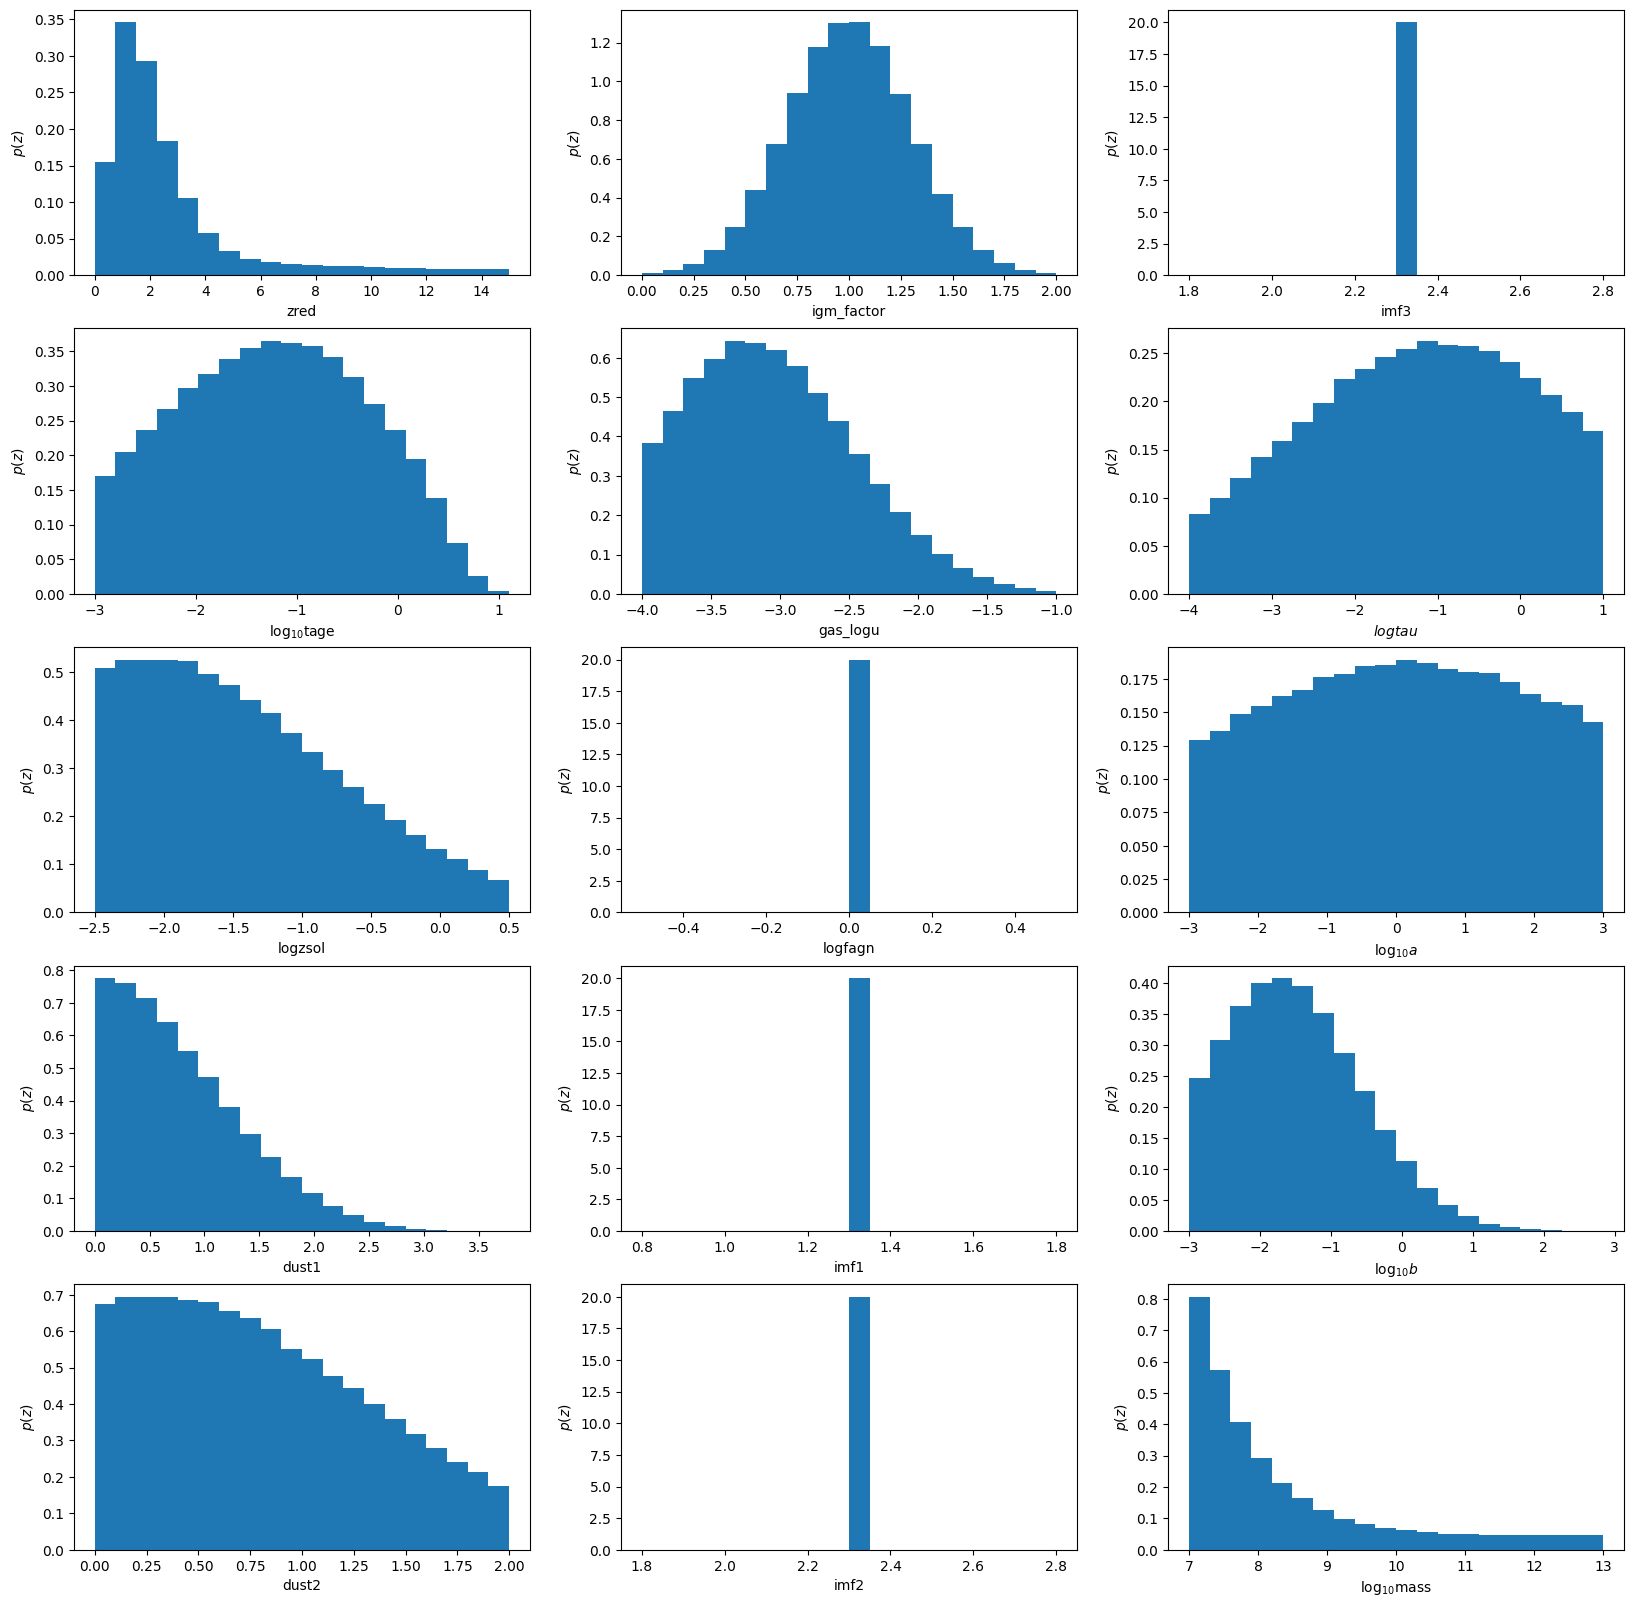

In [5]:
realisation = 1
tools.plot_galaxy_population(sps_params[realisation])

In [6]:
ages = np.vstack(sps_params[realisation][:, 1])
tau = np.vstack(sps_params[realisation][:, 11])
a = np.vstack(sps_params[realisation][:, 12])
b = np.vstack(sps_params[realisation][:, 13])

params = np.hstack((ages, tau, a, b))

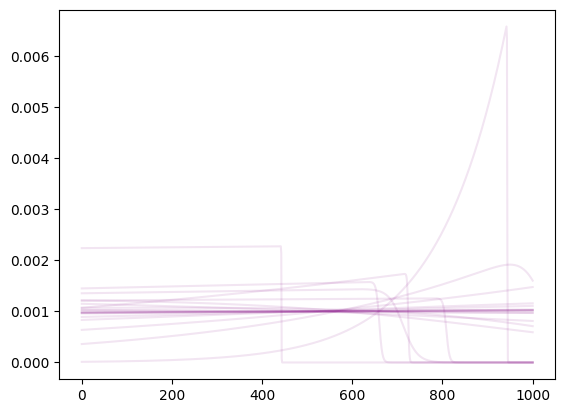

In [88]:
nsamples = 20
plot_multiple_sfhs(params, np.random.randint(0, params.shape[0], nsamples), alpha=0.1)


0.9999999999999998


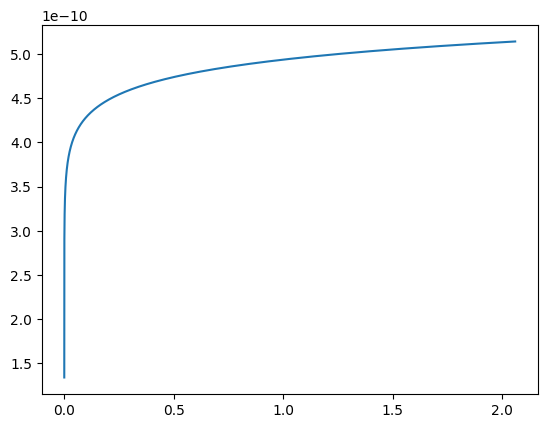

In [101]:
plot_dpl_sfhs(params[np.random.randint(0, params.shape[0]),:], aligned=False)